In [16]:
from collections import defaultdict
import functools
from glob import glob
import re

from matplotlib import pylab as plt
import torch
try:
    import tqdm
    progress = tqdm.tqdm
except ModuleNotFoundError:
    progress = lambda x, *args : x

from odenet import refine_train
from odenet import ode_models
from odenet import datasets

In [11]:
legend_name = lambda fname : re.search(r"ARCH_(.*)_LEARN", fname)[1]

In [83]:
dirs = glob('results/odenet_*ARCH*[*')
results = { name: torch.load(name) for name in dirs }
dirs

['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_1_0.5_1_LEARN_0.005_10_[1, 2, 3]_Adjoint_NormalInit_SEED_1.pkl',
 'results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_1_0.5_1_LEARN_0.005_10_[1, 2, 3]_Adjoint_NormalInit_SEED_1.pkl']

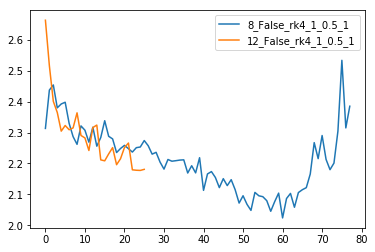

In [88]:
for name, result in results.items():
    plt.plot(result.losses, label=legend_name(name))
    #plt.vlines(result.refine_steps, 0,1)
plt.legend()

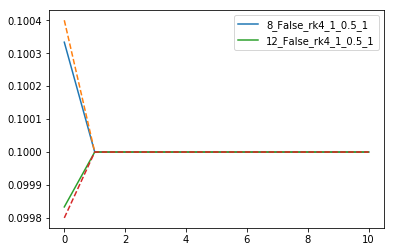

In [86]:
for name, result in results.items():
    plt.plot(result.train_acc, label=legend_name(name))
    plt.plot(result.test_acc, '--')
plt.legend()

In [15]:
refset,trainset,trainloader,testset,testloader = datasets.get_dataset("FMNIST",root='../data/')

In [62]:
from SimDataDB import SimDataDB

This function is permanantly cached with a database. Delete the database to refresh the cache.

In [63]:
sdb = SimDataDB("results/manifestation_study.sqlite")

In [75]:
@sdb.Decorate(
    "fmnist",
    [("network","STRING"),("scheme","STRING"),("num_time","INT"),],
    [("train_acc","INT")])
@torch.no_grad()
def calc_acc_for_scheme_nt(name, scheme, nt):
    mod = results[name].model_list[0]
    mod.eval()
    for net_idx in (3, 6, 9):
        mod.net[net_idx].set_n_time_steps(nt)
        mod.net[net_idx].scheme = scheme
    return [refine_train.calculate_accuracy(mod, testloader)]

Here we query/populate the database and pack it into nested dictionaries.

In [76]:
test_sweep = defaultdict( lambda : {} )
with torch.no_grad():
    for name, result in results.items():
        accs_for_scheme = {}
        for scheme in ('euler', 'midpoint','rk4'):
            accs = []
            for nt in progress(range(3, 19, 3), f"{legend_name(name)}, {scheme}"):
                accs.append((nt, calc_for_scheme_sdb(name, scheme, nt)[0]))
            accs_for_scheme[scheme] = accs
        test_sweep[name].update(accs_for_scheme)
test_sweep

8_False_euler_3_0.5_1, euler:  33%|███▎      | 2/6 [00:04<00:08,  2.06s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 6, 0.1, datetime.datetime(2020, 5, 4, 3, 42, 22, 726270), 4.1153481006622314]


8_False_euler_3_0.5_1, euler:  50%|█████     | 3/6 [00:08<00:08,  2.83s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 9, 0.1, datetime.datetime(2020, 5, 4, 3, 42, 26, 855024), 4.617804050445557]


8_False_euler_3_0.5_1, euler:  67%|██████▋   | 4/6 [00:13<00:07,  3.53s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 12, 0.1, datetime.datetime(2020, 5, 4, 3, 42, 31, 486171), 5.142864942550659]


8_False_euler_3_0.5_1, euler:  83%|████████▎ | 5/6 [00:19<00:04,  4.23s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 15, 0.1, datetime.datetime(2020, 5, 4, 3, 42, 36, 642641), 5.862482786178589]


8_False_euler_3_0.5_1, midpoint:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 18, 0.1, datetime.datetime(2020, 5, 4, 3, 42, 42, 518343), 6.621443033218384]


8_False_euler_3_0.5_1, midpoint:  17%|█▋        | 1/6 [00:03<00:17,  3.48s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 3, 0.1, datetime.datetime(2020, 5, 4, 3, 42, 49, 155179), 3.4673845767974854]


8_False_euler_3_0.5_1, midpoint:  33%|███▎      | 2/6 [00:08<00:15,  3.88s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 6, 0.1, datetime.datetime(2020, 5, 4, 3, 42, 52, 636722), 4.798894882202148]


8_False_euler_3_0.5_1, midpoint:  50%|█████     | 3/6 [00:14<00:13,  4.57s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 9, 0.1, datetime.datetime(2020, 5, 4, 3, 42, 57, 449454), 6.150538444519043]


8_False_euler_3_0.5_1, midpoint:  67%|██████▋   | 4/6 [00:21<00:10,  5.44s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 12, 0.1, datetime.datetime(2020, 5, 4, 3, 43, 3, 616295), 7.467977285385132]


8_False_euler_3_0.5_1, midpoint:  83%|████████▎ | 5/6 [00:30<00:06,  6.46s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 15, 0.1, datetime.datetime(2020, 5, 4, 3, 43, 11, 98324), 8.810420989990234]


8_False_euler_3_0.5_1, rk4:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 18, 0.1, datetime.datetime(2020, 5, 4, 3, 43, 19, 922814), 10.160023212432861]


8_False_euler_3_0.5_1, rk4:  17%|█▋        | 1/6 [00:04<00:24,  4.96s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 3, 0.1, datetime.datetime(2020, 5, 4, 3, 43, 30, 98608), 4.94478702545166]


8_False_euler_3_0.5_1, rk4:  33%|███▎      | 2/6 [00:12<00:23,  5.80s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 6, 0.1, datetime.datetime(2020, 5, 4, 3, 43, 35, 56985), 7.7521514892578125]


8_False_euler_3_0.5_1, rk4:  50%|█████     | 3/6 [00:23<00:21,  7.24s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 9, 0.1, datetime.datetime(2020, 5, 4, 3, 43, 42, 822577), 10.570878028869629]


8_False_euler_3_0.5_1, rk4:  67%|██████▋   | 4/6 [00:36<00:18,  9.09s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 12, 0.1, datetime.datetime(2020, 5, 4, 3, 43, 53, 407625), 13.39946174621582]


8_False_euler_3_0.5_1, rk4:  83%|████████▎ | 5/6 [00:52<00:11, 11.23s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 15, 0.1, datetime.datetime(2020, 5, 4, 3, 44, 6, 820878), 16.209324598312378]


8_False_euler_3_0.5_1, euler:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 18, 0.1, datetime.datetime(2020, 5, 4, 3, 44, 23, 43765), 19.036633491516113]


8_False_euler_3_0.5_1, euler:  17%|█▋        | 1/6 [00:02<00:14,  2.91s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 3, 0.1, datetime.datetime(2020, 5, 4, 3, 44, 42, 96735), 2.900308132171631]


8_False_euler_3_0.5_1, euler:  33%|███▎      | 2/6 [00:06<00:12,  3.23s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 6, 0.1, datetime.datetime(2020, 5, 4, 3, 44, 45, 10366), 3.965158462524414]


8_False_euler_3_0.5_1, euler:  50%|█████     | 3/6 [00:11<00:10,  3.65s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 9, 0.1, datetime.datetime(2020, 5, 4, 3, 44, 48, 988683), 4.605697154998779]


8_False_euler_3_0.5_1, euler:  67%|██████▋   | 4/6 [00:16<00:08,  4.10s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 12, 0.1, datetime.datetime(2020, 5, 4, 3, 44, 53, 607999), 5.138534307479858]


8_False_euler_3_0.5_1, euler:  83%|████████▎ | 5/6 [00:22<00:04,  4.64s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 15, 0.1, datetime.datetime(2020, 5, 4, 3, 44, 58, 759638), 5.890302419662476]


8_False_euler_3_0.5_1, midpoint:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 18, 0.1, datetime.datetime(2020, 5, 4, 3, 45, 4, 663394), 6.623633861541748]


8_False_euler_3_0.5_1, midpoint:  17%|█▋        | 1/6 [00:03<00:17,  3.48s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 3, 0.1, datetime.datetime(2020, 5, 4, 3, 45, 11, 302887), 3.4704926013946533]


8_False_euler_3_0.5_1, midpoint:  33%|███▎      | 2/6 [00:08<00:15,  3.88s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 6, 0.1, datetime.datetime(2020, 5, 4, 3, 45, 14, 787146), 4.796627759933472]


8_False_euler_3_0.5_1, midpoint:  50%|█████     | 3/6 [00:14<00:13,  4.56s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 9, 0.1, datetime.datetime(2020, 5, 4, 3, 45, 19, 597123), 6.134362459182739]


8_False_euler_3_0.5_1, midpoint:  67%|██████▋   | 4/6 [00:21<00:10,  5.44s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 12, 0.1, datetime.datetime(2020, 5, 4, 3, 45, 25, 744629), 7.47254490852356]


8_False_euler_3_0.5_1, midpoint:  83%|████████▎ | 5/6 [00:30<00:06,  6.46s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 15, 0.0997, datetime.datetime(2020, 5, 4, 3, 45, 33, 231050), 8.812311887741089]


8_False_euler_3_0.5_1, rk4:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 18, 0.1002, datetime.datetime(2020, 5, 4, 3, 45, 42, 57337), 10.158743143081665]


8_False_euler_3_0.5_1, rk4:  17%|█▋        | 1/6 [00:04<00:24,  4.96s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 3, 0.1, datetime.datetime(2020, 5, 4, 3, 45, 52, 232685), 4.94972825050354]


8_False_euler_3_0.5_1, rk4:  33%|███▎      | 2/6 [00:12<00:23,  5.81s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 6, 0.1, datetime.datetime(2020, 5, 4, 3, 45, 57, 195764), 7.780043601989746]


8_False_euler_3_0.5_1, rk4:  50%|█████     | 3/6 [00:23<00:21,  7.24s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 9, 0.1, datetime.datetime(2020, 5, 4, 3, 46, 4, 990453), 10.57425570487976]


8_False_euler_3_0.5_1, rk4:  67%|██████▋   | 4/6 [00:36<00:18,  9.09s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 12, 0.1, datetime.datetime(2020, 5, 4, 3, 46, 15, 578449), 13.387763261795044]


8_False_euler_3_0.5_1, rk4:  83%|████████▎ | 5/6 [00:52<00:11, 11.23s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 15, 0.1, datetime.datetime(2020, 5, 4, 3, 46, 28, 979850), 16.213375568389893]


8_False_rk4_3_0.5_1, euler:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 18, 0.1, datetime.datetime(2020, 5, 4, 3, 46, 45, 206843), 19.04855227470398]


8_False_rk4_3_0.5_1, euler:  17%|█▋        | 1/6 [00:02<00:14,  2.91s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 3, 0.2749, datetime.datetime(2020, 5, 4, 3, 47, 4, 272444), 2.896627187728882]


8_False_rk4_3_0.5_1, euler:  33%|███▎      | 2/6 [00:06<00:12,  3.23s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 6, 0.3688, datetime.datetime(2020, 5, 4, 3, 47, 7, 182659), 3.9670298099517822]


8_False_rk4_3_0.5_1, euler:  50%|█████     | 3/6 [00:11<00:10,  3.65s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 9, 0.5984, datetime.datetime(2020, 5, 4, 3, 47, 11, 164650), 4.61300253868103]


8_False_rk4_3_0.5_1, euler:  67%|██████▋   | 4/6 [00:16<00:08,  4.10s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 12, 0.7518, datetime.datetime(2020, 5, 4, 3, 47, 15, 794732), 5.141103267669678]


8_False_rk4_3_0.5_1, euler:  83%|████████▎ | 5/6 [00:22<00:04,  4.64s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 15, 0.7902, datetime.datetime(2020, 5, 4, 3, 47, 20, 949502), 5.864911079406738]


8_False_rk4_3_0.5_1, midpoint:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 18, 0.8059, datetime.datetime(2020, 5, 4, 3, 47, 26, 828316), 6.624905586242676]


8_False_rk4_3_0.5_1, midpoint:  17%|█▋        | 1/6 [00:03<00:17,  3.49s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 3, 0.7849, datetime.datetime(2020, 5, 4, 3, 47, 33, 469958), 3.4740991592407227]


8_False_rk4_3_0.5_1, midpoint:  33%|███▎      | 2/6 [00:08<00:15,  3.89s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 6, 0.799, datetime.datetime(2020, 5, 4, 3, 47, 36, 957640), 4.802230358123779]


8_False_rk4_3_0.5_1, midpoint:  50%|█████     | 3/6 [00:14<00:13,  4.56s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 9, 0.7851, datetime.datetime(2020, 5, 4, 3, 47, 41, 773445), 6.13280987739563]


8_False_rk4_3_0.5_1, midpoint:  67%|██████▋   | 4/6 [00:21<00:10,  5.44s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 12, 0.7771, datetime.datetime(2020, 5, 4, 3, 47, 47, 919575), 7.47257399559021]


8_False_rk4_3_0.5_1, midpoint:  83%|████████▎ | 5/6 [00:30<00:06,  6.46s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 15, 0.7737, datetime.datetime(2020, 5, 4, 3, 47, 55, 405545), 8.828018188476562]


8_False_rk4_3_0.5_1, rk4:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 18, 0.7703, datetime.datetime(2020, 5, 4, 3, 48, 4, 246848), 10.166574954986572]


8_False_rk4_3_0.5_1, rk4:  17%|█▋        | 1/6 [00:04<00:24,  4.97s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 3, 0.8176, datetime.datetime(2020, 5, 4, 3, 48, 14, 439956), 4.951954126358032]


8_False_rk4_3_0.5_1, rk4:  33%|███▎      | 2/6 [00:12<00:23,  5.81s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 6, 0.8019, datetime.datetime(2020, 5, 4, 3, 48, 19, 406001), 7.757816314697266]


8_False_rk4_3_0.5_1, rk4:  50%|█████     | 3/6 [00:23<00:21,  7.24s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 9, 0.7907, datetime.datetime(2020, 5, 4, 3, 48, 27, 177136), 10.577254295349121]


8_False_rk4_3_0.5_1, rk4:  67%|██████▋   | 4/6 [00:36<00:18,  9.09s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 12, 0.7865, datetime.datetime(2020, 5, 4, 3, 48, 37, 767955), 13.39482593536377]


8_False_rk4_3_0.5_1, rk4:  83%|████████▎ | 5/6 [00:52<00:11, 11.24s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 15, 0.7825, datetime.datetime(2020, 5, 4, 3, 48, 51, 176532), 16.22624397277832]


8_False_euler_3_0.5_1, euler:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 18, 0.7798, datetime.datetime(2020, 5, 4, 3, 49, 7, 416853), 19.049238681793213]


8_False_euler_3_0.5_1, euler:  17%|█▋        | 1/6 [00:02<00:14,  2.91s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 3, 0.1, datetime.datetime(2020, 5, 4, 3, 49, 26, 483155), 2.8990628719329834]


8_False_euler_3_0.5_1, euler:  33%|███▎      | 2/6 [00:06<00:12,  3.21s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 6, 0.1, datetime.datetime(2020, 5, 4, 3, 49, 29, 397138), 3.897324323654175]


8_False_euler_3_0.5_1, euler:  50%|█████     | 3/6 [00:11<00:10,  3.63s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 9, 0.1, datetime.datetime(2020, 5, 4, 3, 49, 33, 308590), 4.603150367736816]


8_False_euler_3_0.5_1, euler:  67%|██████▋   | 4/6 [00:16<00:08,  4.09s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 12, 0.1, datetime.datetime(2020, 5, 4, 3, 49, 37, 925807), 5.132328033447266]


8_False_euler_3_0.5_1, euler:  83%|████████▎ | 5/6 [00:22<00:04,  4.62s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 15, 0.1, datetime.datetime(2020, 5, 4, 3, 49, 43, 71581), 5.861095666885376]


8_False_euler_3_0.5_1, midpoint:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 18, 0.1001, datetime.datetime(2020, 5, 4, 3, 49, 48, 946187), 6.623426675796509]


8_False_euler_3_0.5_1, midpoint:  17%|█▋        | 1/6 [00:03<00:17,  3.49s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 3, 0.1, datetime.datetime(2020, 5, 4, 3, 49, 55, 586770), 3.471900463104248]


8_False_euler_3_0.5_1, midpoint:  33%|███▎      | 2/6 [00:08<00:15,  3.89s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 6, 0.1, datetime.datetime(2020, 5, 4, 3, 49, 59, 72600), 4.822166204452515]


8_False_euler_3_0.5_1, midpoint:  50%|█████     | 3/6 [00:14<00:13,  4.57s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 9, 0.1, datetime.datetime(2020, 5, 4, 3, 50, 3, 908529), 6.133848190307617]


8_False_euler_3_0.5_1, midpoint:  67%|██████▋   | 4/6 [00:21<00:10,  5.45s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 12, 0.1, datetime.datetime(2020, 5, 4, 3, 50, 10, 56078), 7.4781653881073]


8_False_euler_3_0.5_1, midpoint:  83%|████████▎ | 5/6 [00:30<00:06,  6.46s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 15, 0.1, datetime.datetime(2020, 5, 4, 3, 50, 17, 547866), 8.812456369400024]


8_False_euler_3_0.5_1, rk4:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 18, 0.1, datetime.datetime(2020, 5, 4, 3, 50, 26, 373747), 10.158322811126709]


8_False_euler_3_0.5_1, rk4:  17%|█▋        | 1/6 [00:04<00:24,  4.96s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 3, 0.1, datetime.datetime(2020, 5, 4, 3, 50, 36, 549058), 4.9498772621154785]


8_False_euler_3_0.5_1, rk4:  33%|███▎      | 2/6 [00:12<00:23,  5.80s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 6, 0.1003, datetime.datetime(2020, 5, 4, 3, 50, 41, 512353), 7.753657579421997]


8_False_euler_3_0.5_1, rk4:  50%|█████     | 3/6 [00:23<00:21,  7.24s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 9, 0.0998, datetime.datetime(2020, 5, 4, 3, 50, 49, 279797), 10.571690559387207]


8_False_euler_3_0.5_1, rk4:  67%|██████▋   | 4/6 [00:36<00:18,  9.09s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 12, 0.1001, datetime.datetime(2020, 5, 4, 3, 50, 59, 865067), 13.403093099594116]


8_False_euler_3_0.5_1, rk4:  83%|████████▎ | 5/6 [00:52<00:11, 11.23s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 15, 0.1, datetime.datetime(2020, 5, 4, 3, 51, 13, 281882), 16.211209297180176]


12_False_rk4_3_0.5_1, euler:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 18, 0.1, datetime.datetime(2020, 5, 4, 3, 51, 29, 506655), 19.04350233078003]


12_False_rk4_3_0.5_1, euler:  17%|█▋        | 1/6 [00:03<00:15,  3.14s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 3, 0.1748, datetime.datetime(2020, 5, 4, 3, 51, 48, 566684), 3.124131202697754]


12_False_rk4_3_0.5_1, euler:  33%|███▎      | 2/6 [00:07<00:13,  3.45s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 6, 0.5, datetime.datetime(2020, 5, 4, 3, 51, 51, 704487), 4.167708158493042]


12_False_rk4_3_0.5_1, euler:  50%|█████     | 3/6 [00:12<00:11,  3.94s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 9, 0.6477, datetime.datetime(2020, 5, 4, 3, 51, 55, 885652), 5.06736421585083]


12_False_rk4_3_0.5_1, euler:  67%|██████▋   | 4/6 [00:18<00:09,  4.58s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 12, 0.7059, datetime.datetime(2020, 5, 4, 3, 52, 0, 966714), 6.071705341339111]


12_False_rk4_3_0.5_1, euler:  83%|████████▎ | 5/6 [00:25<00:05,  5.33s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 15, 0.7423, datetime.datetime(2020, 5, 4, 3, 52, 7, 52001), 7.047430992126465]


12_False_rk4_3_0.5_1, midpoint:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 18, 0.7617, datetime.datetime(2020, 5, 4, 3, 52, 14, 113016), 8.03735089302063]


12_False_rk4_3_0.5_1, midpoint:  17%|█▋        | 1/6 [00:03<00:19,  3.94s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 3, 0.7495, datetime.datetime(2020, 5, 4, 3, 52, 22, 167867), 3.930161714553833]


12_False_rk4_3_0.5_1, midpoint:  33%|███▎      | 2/6 [00:09<00:17,  4.49s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 6, 0.8056, datetime.datetime(2020, 5, 4, 3, 52, 26, 111284), 5.7313783168792725]


12_False_rk4_3_0.5_1, midpoint:  50%|█████     | 3/6 [00:17<00:16,  5.41s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 9, 0.8101, datetime.datetime(2020, 5, 4, 3, 52, 31, 865725), 7.541326284408569]


12_False_rk4_3_0.5_1, midpoint:  67%|██████▋   | 4/6 [00:26<00:13,  6.60s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 12, 0.8111, datetime.datetime(2020, 5, 4, 3, 52, 39, 420866), 9.35980772972107]


12_False_rk4_3_0.5_1, midpoint:  83%|████████▎ | 5/6 [00:37<00:07,  7.97s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 15, 0.8117, datetime.datetime(2020, 5, 4, 3, 52, 48, 794669), 11.173933267593384]


12_False_rk4_3_0.5_1, rk4:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 18, 0.8117, datetime.datetime(2020, 5, 4, 3, 52, 59, 984130), 13.002268552780151]


12_False_rk4_3_0.5_1, rk4:  17%|█▋        | 1/6 [00:06<00:30,  6.03s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 3, 0.8359, datetime.datetime(2020, 5, 4, 3, 53, 13, 2518), 6.012985944747925]


12_False_rk4_3_0.5_1, rk4:  33%|███▎      | 2/6 [00:15<00:28,  7.19s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 6, 0.8315, datetime.datetime(2020, 5, 4, 3, 53, 19, 29302), 9.88338303565979]


12_False_rk4_3_0.5_1, rk4:  50%|█████     | 3/6 [00:29<00:27,  9.17s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 9, 0.8256, datetime.datetime(2020, 5, 4, 3, 53, 28, 926016), 13.774154901504517]


12_False_rk4_3_0.5_1, rk4:  67%|██████▋   | 4/6 [00:47<00:23, 11.72s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 12, 0.8227, datetime.datetime(2020, 5, 4, 3, 53, 42, 713740), 17.668158531188965]


12_False_rk4_3_0.5_1, rk4:  83%|████████▎ | 5/6 [01:08<00:14, 14.68s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 15, 0.8209, datetime.datetime(2020, 5, 4, 3, 54, 0, 395292), 21.571775197982788]


8_False_rk4_3_0.5_1, euler:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 18, 0.8193, datetime.datetime(2020, 5, 4, 3, 54, 21, 980385), 25.463670253753662]


8_False_rk4_3_0.5_1, euler:  17%|█▋        | 1/6 [00:02<00:14,  2.91s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 3, 0.2682, datetime.datetime(2020, 5, 4, 3, 54, 47, 460558), 2.8975112438201904]


8_False_rk4_3_0.5_1, euler:  33%|███▎      | 2/6 [00:06<00:12,  3.23s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 6, 0.3833, datetime.datetime(2020, 5, 4, 3, 54, 50, 371521), 3.9661457538604736]


8_False_rk4_3_0.5_1, euler:  50%|█████     | 3/6 [00:11<00:10,  3.65s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 9, 0.5808, datetime.datetime(2020, 5, 4, 3, 54, 54, 351615), 4.622265577316284]


8_False_rk4_3_0.5_1, euler:  67%|██████▋   | 4/6 [00:16<00:08,  4.11s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 12, 0.7031, datetime.datetime(2020, 5, 4, 3, 54, 58, 987321), 5.170271635055542]


8_False_rk4_3_0.5_1, euler:  83%|████████▎ | 5/6 [00:22<00:04,  4.64s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 15, 0.754, datetime.datetime(2020, 5, 4, 3, 55, 4, 170946), 5.870790481567383]


8_False_rk4_3_0.5_1, midpoint:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 18, 0.7688, datetime.datetime(2020, 5, 4, 3, 55, 10, 55258), 6.63029932975769]


8_False_rk4_3_0.5_1, midpoint:  17%|█▋        | 1/6 [00:03<00:17,  3.49s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 3, 0.7233, datetime.datetime(2020, 5, 4, 3, 55, 16, 701236), 3.474334716796875]


8_False_rk4_3_0.5_1, midpoint:  33%|███▎      | 2/6 [00:08<00:15,  3.89s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 6, 0.7826, datetime.datetime(2020, 5, 4, 3, 55, 20, 189277), 4.8067121505737305]


8_False_rk4_3_0.5_1, midpoint:  50%|█████     | 3/6 [00:14<00:13,  4.57s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 9, 0.7789, datetime.datetime(2020, 5, 4, 3, 55, 25, 9258), 6.1401731967926025]


8_False_rk4_3_0.5_1, midpoint:  67%|██████▋   | 4/6 [00:21<00:10,  5.45s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 12, 0.7746, datetime.datetime(2020, 5, 4, 3, 55, 31, 163116), 7.480690002441406]


8_False_rk4_3_0.5_1, midpoint:  83%|████████▎ | 5/6 [00:30<00:06,  6.46s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 15, 0.7721, datetime.datetime(2020, 5, 4, 3, 55, 38, 658174), 8.817738771438599]


8_False_rk4_3_0.5_1, rk4:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 18, 0.7708, datetime.datetime(2020, 5, 4, 3, 55, 47, 491213), 10.166438817977905]


8_False_rk4_3_0.5_1, rk4:  17%|█▋        | 1/6 [00:04<00:24,  4.98s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 3, 0.7949, datetime.datetime(2020, 5, 4, 3, 55, 57, 673658), 4.966518878936768]


8_False_rk4_3_0.5_1, rk4:  33%|███▎      | 2/6 [00:12<00:23,  5.82s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 6, 0.7863, datetime.datetime(2020, 5, 4, 3, 56, 2, 654141), 7.769556760787964]


8_False_rk4_3_0.5_1, rk4:  50%|█████     | 3/6 [00:23<00:21,  7.26s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 9, 0.7812, datetime.datetime(2020, 5, 4, 3, 56, 10, 437071), 10.58981466293335]


8_False_rk4_3_0.5_1, rk4:  67%|██████▋   | 4/6 [00:36<00:18,  9.10s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 12, 0.7773, datetime.datetime(2020, 5, 4, 3, 56, 21, 40149), 13.405881643295288]


8_False_rk4_3_0.5_1, rk4:  83%|████████▎ | 5/6 [00:53<00:11, 11.24s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 15, 0.7754, datetime.datetime(2020, 5, 4, 3, 56, 34, 460225), 16.224396228790283]


12_False_euler_3_0.5_1, euler:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 18, 0.7742, datetime.datetime(2020, 5, 4, 3, 56, 50, 698166), 19.056639671325684]


12_False_euler_3_0.5_1, euler:  17%|█▋        | 1/6 [00:03<00:15,  3.14s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 3, 0.5143, datetime.datetime(2020, 5, 4, 3, 57, 9, 770395), 3.126110315322876]


12_False_euler_3_0.5_1, euler:  33%|███▎      | 2/6 [00:07<00:13,  3.46s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 6, 0.1, datetime.datetime(2020, 5, 4, 3, 57, 12, 910037), 4.188763856887817]


12_False_euler_3_0.5_1, euler:  50%|█████     | 3/6 [00:12<00:11,  3.95s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 9, 0.1, datetime.datetime(2020, 5, 4, 3, 57, 17, 111949), 5.072245836257935]


12_False_euler_3_0.5_1, euler:  67%|██████▋   | 4/6 [00:18<00:09,  4.58s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 12, 0.1004, datetime.datetime(2020, 5, 4, 3, 57, 22, 197655), 6.054542779922485]


12_False_euler_3_0.5_1, euler:  83%|████████▎ | 5/6 [00:25<00:05,  5.33s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 15, 0.1448, datetime.datetime(2020, 5, 4, 3, 57, 28, 265676), 7.046860218048096]


12_False_euler_3_0.5_1, midpoint:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 18, 0.1198, datetime.datetime(2020, 5, 4, 3, 57, 35, 326264), 8.037301540374756]


12_False_euler_3_0.5_1, midpoint:  17%|█▋        | 1/6 [00:03<00:19,  3.95s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 3, 0.1, datetime.datetime(2020, 5, 4, 3, 57, 43, 381998), 3.9325995445251465]


12_False_euler_3_0.5_1, midpoint:  33%|███▎      | 2/6 [00:09<00:17,  4.49s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 6, 0.1007, datetime.datetime(2020, 5, 4, 3, 57, 47, 327967), 5.730677127838135]


12_False_euler_3_0.5_1, midpoint:  50%|█████     | 3/6 [00:17<00:16,  5.41s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 9, 0.1497, datetime.datetime(2020, 5, 4, 3, 57, 53, 72300), 7.542070627212524]


12_False_euler_3_0.5_1, midpoint:  67%|██████▋   | 4/6 [00:26<00:13,  6.60s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 12, 0.1, datetime.datetime(2020, 5, 4, 3, 58, 0, 628340), 9.362077713012695]


12_False_euler_3_0.5_1, midpoint:  83%|████████▎ | 5/6 [00:37<00:07,  7.97s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 15, 0.1, datetime.datetime(2020, 5, 4, 3, 58, 10, 3860), 11.161299705505371]


12_False_euler_3_0.5_1, rk4:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 18, 0.1, datetime.datetime(2020, 5, 4, 3, 58, 21, 178557), 12.983356952667236]


12_False_euler_3_0.5_1, rk4:  17%|█▋        | 1/6 [00:06<00:30,  6.02s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 3, 0.1565, datetime.datetime(2020, 5, 4, 3, 58, 34, 178481), 6.009160757064819]


12_False_euler_3_0.5_1, rk4:  33%|███▎      | 2/6 [00:15<00:28,  7.18s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 6, 0.1, datetime.datetime(2020, 5, 4, 3, 58, 40, 201414), 9.882455825805664]


12_False_euler_3_0.5_1, rk4:  50%|█████     | 3/6 [00:29<00:27,  9.18s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 9, 0.1, datetime.datetime(2020, 5, 4, 3, 58, 50, 98495), 13.812575817108154]


12_False_euler_3_0.5_1, rk4:  67%|██████▋   | 4/6 [00:47<00:23, 11.73s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 12, 0.1, datetime.datetime(2020, 5, 4, 3, 59, 3, 924489), 17.67405080795288]


12_False_euler_3_0.5_1, rk4:  83%|████████▎ | 5/6 [01:09<00:14, 14.68s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 15, 0.1, datetime.datetime(2020, 5, 4, 3, 59, 21, 613396), 21.55854320526123]


8_False_rk4_3_0.5_1, euler:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 18, 0.1, datetime.datetime(2020, 5, 4, 3, 59, 43, 186072), 25.47119903564453]


8_False_rk4_3_0.5_1, euler:  17%|█▋        | 1/6 [00:02<00:14,  2.92s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.1_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 3, 0.1, datetime.datetime(2020, 5, 4, 4, 0, 8, 674585), 2.904561996459961]


8_False_rk4_3_0.5_1, euler:  33%|███▎      | 2/6 [00:06<00:12,  3.20s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.1_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 6, 0.1, datetime.datetime(2020, 5, 4, 4, 0, 11, 593073), 3.844838857650757]


8_False_rk4_3_0.5_1, euler:  50%|█████     | 3/6 [00:11<00:10,  3.63s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.1_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 9, 0.1, datetime.datetime(2020, 5, 4, 4, 0, 15, 451746), 4.606306314468384]


8_False_rk4_3_0.5_1, euler:  67%|██████▋   | 4/6 [00:16<00:08,  4.09s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.1_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 12, 0.1, datetime.datetime(2020, 5, 4, 4, 0, 20, 71441), 5.147128105163574]


8_False_rk4_3_0.5_1, euler:  83%|████████▎ | 5/6 [00:22<00:04,  4.63s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.1_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 15, 0.1, datetime.datetime(2020, 5, 4, 4, 0, 25, 244270), 5.8776843547821045]


8_False_rk4_3_0.5_1, midpoint:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.1_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 18, 0.1, datetime.datetime(2020, 5, 4, 4, 0, 31, 136232), 6.638689994812012]


8_False_rk4_3_0.5_1, midpoint:  17%|█▋        | 1/6 [00:03<00:17,  3.49s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.1_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 3, 0.1, datetime.datetime(2020, 5, 4, 4, 0, 37, 791123), 3.4816060066223145]


8_False_rk4_3_0.5_1, midpoint:  33%|███▎      | 2/6 [00:08<00:15,  3.89s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.1_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 6, 0.1, datetime.datetime(2020, 5, 4, 4, 0, 41, 286551), 4.809185028076172]


8_False_rk4_3_0.5_1, midpoint:  50%|█████     | 3/6 [00:14<00:13,  4.57s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.1_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 9, 0.1, datetime.datetime(2020, 5, 4, 4, 0, 46, 108671), 6.14384388923645]


8_False_rk4_3_0.5_1, midpoint:  67%|██████▋   | 4/6 [00:21<00:10,  5.45s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.1_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 12, 0.1, datetime.datetime(2020, 5, 4, 4, 0, 52, 265781), 7.482120752334595]


8_False_rk4_3_0.5_1, midpoint:  83%|████████▎ | 5/6 [00:30<00:06,  6.47s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.1_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 15, 0.1, datetime.datetime(2020, 5, 4, 4, 0, 59, 761314), 8.84702754020691]


8_False_rk4_3_0.5_1, rk4:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.1_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 18, 0.1, datetime.datetime(2020, 5, 4, 4, 1, 8, 622303), 10.17125391960144]


8_False_rk4_3_0.5_1, rk4:  17%|█▋        | 1/6 [00:04<00:24,  4.97s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.1_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 3, 0.1, datetime.datetime(2020, 5, 4, 4, 1, 18, 809662), 4.958166599273682]


8_False_rk4_3_0.5_1, rk4:  33%|███▎      | 2/6 [00:12<00:23,  5.81s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.1_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 6, 0.1, datetime.datetime(2020, 5, 4, 4, 1, 23, 782562), 7.763780832290649]


8_False_rk4_3_0.5_1, rk4:  50%|█████     | 3/6 [00:23<00:21,  7.25s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.1_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 9, 0.1, datetime.datetime(2020, 5, 4, 4, 1, 31, 561019), 10.589133501052856]


8_False_rk4_3_0.5_1, rk4:  67%|██████▋   | 4/6 [00:36<00:18,  9.10s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.1_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 12, 0.1, datetime.datetime(2020, 5, 4, 4, 1, 42, 163866), 13.399698495864868]


8_False_rk4_3_0.5_1, rk4:  83%|████████▎ | 5/6 [00:53<00:11, 11.24s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.1_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 15, 0.1, datetime.datetime(2020, 5, 4, 4, 1, 55, 577200), 16.222005367279053]


8_False_midpoint_3_0.5_1, euler:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.1_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 18, 0.1, datetime.datetime(2020, 5, 4, 4, 2, 11, 812977), 19.048811197280884]


8_False_midpoint_3_0.5_1, euler:  17%|█▋        | 1/6 [00:02<00:14,  2.91s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 3, 0.2538, datetime.datetime(2020, 5, 4, 4, 2, 30, 877740), 2.9018683433532715]


8_False_midpoint_3_0.5_1, euler:  33%|███▎      | 2/6 [00:06<00:12,  3.23s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 6, 0.6866, datetime.datetime(2020, 5, 4, 4, 2, 33, 793064), 3.9691367149353027]


8_False_midpoint_3_0.5_1, euler:  50%|█████     | 3/6 [00:11<00:10,  3.66s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 9, 0.8346, datetime.datetime(2020, 5, 4, 4, 2, 37, 775771), 4.625865697860718]


8_False_midpoint_3_0.5_1, euler:  67%|██████▋   | 4/6 [00:16<00:08,  4.10s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 12, 0.8555, datetime.datetime(2020, 5, 4, 4, 2, 42, 417945), 5.136465549468994]


8_False_midpoint_3_0.5_1, euler:  83%|████████▎ | 5/6 [00:22<00:04,  4.64s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 15, 0.8611, datetime.datetime(2020, 5, 4, 4, 2, 47, 568160), 5.8745222091674805]


8_False_midpoint_3_0.5_1, midpoint:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 18, 0.8603, datetime.datetime(2020, 5, 4, 4, 2, 53, 456770), 6.638329267501831]


8_False_midpoint_3_0.5_1, midpoint:  17%|█▋        | 1/6 [00:03<00:17,  3.53s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 3, 0.8545, datetime.datetime(2020, 5, 4, 4, 3, 0, 111042), 3.503120183944702]


8_False_midpoint_3_0.5_1, midpoint:  33%|███▎      | 2/6 [00:08<00:15,  3.92s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 6, 0.8453, datetime.datetime(2020, 5, 4, 4, 3, 3, 639764), 4.807042360305786]


8_False_midpoint_3_0.5_1, midpoint:  50%|█████     | 3/6 [00:14<00:13,  4.59s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 9, 0.843, datetime.datetime(2020, 5, 4, 4, 3, 8, 460237), 6.147502899169922]


8_False_midpoint_3_0.5_1, midpoint:  67%|██████▋   | 4/6 [00:22<00:10,  5.46s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 12, 0.8404, datetime.datetime(2020, 5, 4, 4, 3, 14, 621277), 7.4896135330200195]


8_False_midpoint_3_0.5_1, midpoint:  83%|████████▎ | 5/6 [00:30<00:06,  6.48s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 15, 0.839, datetime.datetime(2020, 5, 4, 4, 3, 22, 124024), 8.828942060470581]


8_False_midpoint_3_0.5_1, rk4:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 18, 0.8381, datetime.datetime(2020, 5, 4, 4, 3, 30, 966525), 10.176603317260742]


8_False_midpoint_3_0.5_1, rk4:  17%|█▋        | 1/6 [00:04<00:24,  4.97s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 3, 0.8373, datetime.datetime(2020, 5, 4, 4, 3, 41, 158452), 4.958391189575195]


8_False_midpoint_3_0.5_1, rk4:  33%|███▎      | 2/6 [00:12<00:23,  5.81s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 6, 0.8403, datetime.datetime(2020, 5, 4, 4, 3, 46, 130126), 7.761380910873413]


8_False_midpoint_3_0.5_1, rk4:  50%|█████     | 3/6 [00:23<00:21,  7.25s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 9, 0.8409, datetime.datetime(2020, 5, 4, 4, 3, 53, 905414), 10.601384162902832]


8_False_midpoint_3_0.5_1, rk4:  67%|██████▋   | 4/6 [00:36<00:18,  9.10s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 12, 0.8405, datetime.datetime(2020, 5, 4, 4, 4, 4, 521017), 13.405959606170654]


8_False_midpoint_3_0.5_1, rk4:  83%|████████▎ | 5/6 [00:53<00:11, 11.25s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 15, 0.8402, datetime.datetime(2020, 5, 4, 4, 4, 17, 940805), 16.230186700820923]


16_False_rk4_3_0.5_1, euler:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 18, 0.8396, datetime.datetime(2020, 5, 4, 4, 4, 34, 185019), 19.0599102973938]


16_False_rk4_3_0.5_1, euler:  17%|█▋        | 1/6 [00:03<00:16,  3.32s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 3, 0.1, datetime.datetime(2020, 5, 4, 4, 4, 53, 261307), 3.3024158477783203]


16_False_rk4_3_0.5_1, euler:  33%|███▎      | 2/6 [00:07<00:14,  3.66s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 6, 0.1, datetime.datetime(2020, 5, 4, 4, 4, 56, 576907), 4.449238538742065]


16_False_rk4_3_0.5_1, euler:  50%|█████     | 3/6 [00:13<00:12,  4.25s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 9, 0.1, datetime.datetime(2020, 5, 4, 4, 5, 1, 40290), 5.629550457000732]


16_False_rk4_3_0.5_1, euler:  67%|██████▋   | 4/6 [00:20<00:10,  5.02s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 12, 0.1, datetime.datetime(2020, 5, 4, 4, 5, 6, 683171), 6.777127027511597]


16_False_rk4_3_0.5_1, euler:  83%|████████▎ | 5/6 [00:28<00:05,  5.90s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 15, 0.1, datetime.datetime(2020, 5, 4, 4, 5, 13, 473439), 7.946503639221191]


16_False_rk4_3_0.5_1, midpoint:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 18, 0.1, datetime.datetime(2020, 5, 4, 4, 5, 21, 433721), 9.107715368270874]


16_False_rk4_3_0.5_1, midpoint:  17%|█▋        | 1/6 [00:04<00:21,  4.31s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 3, 0.1, datetime.datetime(2020, 5, 4, 4, 5, 30, 558556), 4.294270992279053]


16_False_rk4_3_0.5_1, midpoint:  33%|███▎      | 2/6 [00:10<00:19,  4.95s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 6, 0.1, datetime.datetime(2020, 5, 4, 4, 5, 34, 867030), 6.441922664642334]


16_False_rk4_3_0.5_1, midpoint:  50%|█████     | 3/6 [00:19<00:18,  6.05s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 9, 0.1, datetime.datetime(2020, 5, 4, 4, 5, 41, 323441), 8.605240106582642]


16_False_rk4_3_0.5_1, midpoint:  67%|██████▋   | 4/6 [00:30<00:14,  7.47s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 12, 0.1, datetime.datetime(2020, 5, 4, 4, 5, 49, 943338), 10.770593404769897]


16_False_rk4_3_0.5_1, midpoint:  83%|████████▎ | 5/6 [00:43<00:09,  9.12s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 15, 0.1, datetime.datetime(2020, 5, 4, 4, 6, 0, 727714), 12.947885036468506]


16_False_rk4_3_0.5_1, rk4:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 18, 0.1, datetime.datetime(2020, 5, 4, 4, 6, 13, 689047), 15.101682901382446]


16_False_rk4_3_0.5_1, rk4:  17%|█▋        | 1/6 [00:06<00:34,  6.85s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 3, 0.1, datetime.datetime(2020, 5, 4, 4, 6, 28, 806417), 6.835198402404785]


16_False_rk4_3_0.5_1, rk4:  33%|███▎      | 2/6 [00:18<00:33,  8.26s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 6, 0.1, datetime.datetime(2020, 5, 4, 4, 6, 35, 655319), 11.53589940071106]


16_False_rk4_3_0.5_1, rk4:  50%|█████     | 3/6 [00:34<00:31, 10.66s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 9, 0.1, datetime.datetime(2020, 5, 4, 4, 6, 47, 204681), 16.263261795043945]


16_False_rk4_3_0.5_1, rk4:  67%|██████▋   | 4/6 [00:55<00:27, 13.76s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 12, 0.1, datetime.datetime(2020, 5, 4, 4, 7, 3, 482023), 20.966389417648315]


16_False_rk4_3_0.5_1, rk4:  83%|████████▎ | 5/6 [01:21<00:17, 17.34s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 15, 0.1, datetime.datetime(2020, 5, 4, 4, 7, 24, 462387), 25.674781560897827]


12_False_rk4_3_0.5_1, euler:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 18, 0.1, datetime.datetime(2020, 5, 4, 4, 7, 50, 151059), 30.410154342651367]


12_False_rk4_3_0.5_1, euler:  17%|█▋        | 1/6 [00:03<00:15,  3.15s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 3, 0.444, datetime.datetime(2020, 5, 4, 4, 8, 20, 577430), 3.132784128189087]


12_False_rk4_3_0.5_1, euler:  33%|███▎      | 2/6 [00:07<00:13,  3.47s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 6, 0.6792, datetime.datetime(2020, 5, 4, 4, 8, 23, 723891), 4.210639476776123]


12_False_rk4_3_0.5_1, euler:  50%|█████     | 3/6 [00:12<00:11,  3.95s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 9, 0.7312, datetime.datetime(2020, 5, 4, 4, 8, 27, 948282), 5.071009635925293]


12_False_rk4_3_0.5_1, euler:  67%|██████▋   | 4/6 [00:18<00:09,  4.59s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 12, 0.7514, datetime.datetime(2020, 5, 4, 4, 8, 33, 33182), 6.063199758529663]


12_False_rk4_3_0.5_1, euler:  83%|████████▎ | 5/6 [00:25<00:05,  5.33s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 15, 0.7599, datetime.datetime(2020, 5, 4, 4, 8, 39, 110122), 7.053717374801636]


12_False_rk4_3_0.5_1, midpoint:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 18, 0.7657, datetime.datetime(2020, 5, 4, 4, 8, 46, 177470), 8.042800903320312]


12_False_rk4_3_0.5_1, midpoint:  17%|█▋        | 1/6 [00:03<00:19,  3.95s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 3, 0.7527, datetime.datetime(2020, 5, 4, 4, 8, 54, 236317), 3.9367258548736572]


12_False_rk4_3_0.5_1, midpoint:  33%|███▎      | 2/6 [00:09<00:17,  4.50s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 6, 0.7668, datetime.datetime(2020, 5, 4, 4, 8, 58, 186653), 5.754414319992065]


12_False_rk4_3_0.5_1, midpoint:  50%|█████     | 3/6 [00:17<00:16,  5.42s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 9, 0.758, datetime.datetime(2020, 5, 4, 4, 9, 3, 954767), 7.553866147994995]


12_False_rk4_3_0.5_1, midpoint:  67%|██████▋   | 4/6 [00:26<00:13,  6.61s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 12, 0.7525, datetime.datetime(2020, 5, 4, 4, 9, 11, 522012), 9.368761777877808]


12_False_rk4_3_0.5_1, midpoint:  83%|████████▎ | 5/6 [00:37<00:07,  7.98s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 15, 0.7503, datetime.datetime(2020, 5, 4, 4, 9, 20, 904171), 11.186953067779541]


12_False_rk4_3_0.5_1, rk4:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 18, 0.7489, datetime.datetime(2020, 5, 4, 4, 9, 32, 104607), 13.00450873374939]


12_False_rk4_3_0.5_1, rk4:  17%|█▋        | 1/6 [00:06<00:30,  6.03s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 3, 0.8535, datetime.datetime(2020, 5, 4, 4, 9, 45, 124891), 6.0134501457214355]


12_False_rk4_3_0.5_1, rk4:  33%|███▎      | 2/6 [00:15<00:28,  7.19s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 6, 0.8087, datetime.datetime(2020, 5, 4, 4, 9, 51, 153232), 9.887861490249634]


12_False_rk4_3_0.5_1, rk4:  50%|█████     | 3/6 [00:29<00:27,  9.18s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 9, 0.7886, datetime.datetime(2020, 5, 4, 4, 10, 1, 54753), 13.799754858016968]


12_False_rk4_3_0.5_1, rk4:  67%|██████▋   | 4/6 [00:47<00:23, 11.73s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 12, 0.7775, datetime.datetime(2020, 5, 4, 4, 10, 14, 868282), 17.684195280075073]


12_False_rk4_3_0.5_1, rk4:  83%|████████▎ | 5/6 [01:09<00:14, 14.69s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 15, 0.7711, datetime.datetime(2020, 5, 4, 4, 10, 32, 566337), 21.58038640022278]


8_False_midpoint_3_0.5_1, euler:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 18, 0.7667, datetime.datetime(2020, 5, 4, 4, 10, 54, 161364), 25.497732162475586]


8_False_midpoint_3_0.5_1, euler:  17%|█▋        | 1/6 [00:02<00:14,  2.92s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 3, 0.1, datetime.datetime(2020, 5, 4, 4, 11, 19, 675188), 2.907196044921875]


8_False_midpoint_3_0.5_1, euler:  33%|███▎      | 2/6 [00:06<00:12,  3.24s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 6, 0.1, datetime.datetime(2020, 5, 4, 4, 11, 22, 595940), 3.972977638244629]


8_False_midpoint_3_0.5_1, euler:  50%|█████     | 3/6 [00:11<00:10,  3.66s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 9, 0.1, datetime.datetime(2020, 5, 4, 4, 11, 26, 582304), 4.6126868724823]


8_False_midpoint_3_0.5_1, euler:  67%|██████▋   | 4/6 [00:16<00:08,  4.11s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 12, 0.1, datetime.datetime(2020, 5, 4, 4, 11, 31, 208744), 5.150686740875244]


8_False_midpoint_3_0.5_1, euler:  83%|████████▎ | 5/6 [00:22<00:04,  4.64s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 15, 0.1, datetime.datetime(2020, 5, 4, 4, 11, 36, 373232), 5.877604722976685]


8_False_midpoint_3_0.5_1, midpoint:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 18, 0.1, datetime.datetime(2020, 5, 4, 4, 11, 42, 264731), 6.645533323287964]


8_False_midpoint_3_0.5_1, midpoint:  17%|█▋        | 1/6 [00:03<00:17,  3.49s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 3, 0.1, datetime.datetime(2020, 5, 4, 4, 11, 48, 925893), 3.4787631034851074]


8_False_midpoint_3_0.5_1, midpoint:  33%|███▎      | 2/6 [00:08<00:15,  3.89s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 6, 0.1, datetime.datetime(2020, 5, 4, 4, 11, 52, 418101), 4.818542242050171]


8_False_midpoint_3_0.5_1, midpoint:  50%|█████     | 3/6 [00:14<00:13,  4.58s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 9, 0.1, datetime.datetime(2020, 5, 4, 4, 11, 57, 250183), 6.170397043228149]


8_False_midpoint_3_0.5_1, midpoint:  67%|██████▋   | 4/6 [00:22<00:10,  5.46s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 12, 0.1, datetime.datetime(2020, 5, 4, 4, 12, 3, 434130), 7.490087509155273]


8_False_midpoint_3_0.5_1, midpoint:  83%|████████▎ | 5/6 [00:30<00:06,  6.47s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 15, 0.1, datetime.datetime(2020, 5, 4, 4, 12, 10, 938318), 8.830499649047852]


8_False_midpoint_3_0.5_1, rk4:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 18, 0.1, datetime.datetime(2020, 5, 4, 4, 12, 19, 782537), 10.181213617324829]


8_False_midpoint_3_0.5_1, rk4:  17%|█▋        | 1/6 [00:04<00:24,  4.97s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 3, 0.1, datetime.datetime(2020, 5, 4, 4, 12, 29, 979109), 4.960282802581787]


8_False_midpoint_3_0.5_1, rk4:  33%|███▎      | 2/6 [00:12<00:23,  5.82s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 6, 0.1, datetime.datetime(2020, 5, 4, 4, 12, 34, 954203), 7.763094663619995]


8_False_midpoint_3_0.5_1, rk4:  50%|█████     | 3/6 [00:23<00:21,  7.25s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 9, 0.1, datetime.datetime(2020, 5, 4, 4, 12, 42, 731151), 10.587463617324829]


8_False_midpoint_3_0.5_1, rk4:  67%|██████▋   | 4/6 [00:36<00:18,  9.11s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 12, 0.1, datetime.datetime(2020, 5, 4, 4, 12, 53, 332236), 13.41450834274292]


8_False_midpoint_3_0.5_1, rk4:  83%|████████▎ | 5/6 [00:53<00:11, 11.25s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 15, 0.1, datetime.datetime(2020, 5, 4, 4, 13, 6, 766181), 16.227123498916626]


16_False_euler_3_0.5_1, euler:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 18, 0.1, datetime.datetime(2020, 5, 4, 4, 13, 23, 7088), 19.05912470817566]


16_False_euler_3_0.5_1, euler:  17%|█▋        | 1/6 [00:03<00:16,  3.32s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 3, 0.8406, datetime.datetime(2020, 5, 4, 4, 13, 42, 84190), 3.3026630878448486]


16_False_euler_3_0.5_1, euler:  33%|███▎      | 2/6 [00:07<00:14,  3.66s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 6, 0.5901, datetime.datetime(2020, 5, 4, 4, 13, 45, 399948), 4.457158803939819]


16_False_euler_3_0.5_1, euler:  50%|█████     | 3/6 [00:13<00:12,  4.25s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 9, 0.5088, datetime.datetime(2020, 5, 4, 4, 13, 49, 870914), 5.62183403968811]


16_False_euler_3_0.5_1, euler:  67%|██████▋   | 4/6 [00:20<00:10,  5.02s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 12, 0.4551, datetime.datetime(2020, 5, 4, 4, 13, 55, 506199), 6.798011302947998]


16_False_euler_3_0.5_1, euler:  83%|████████▎ | 5/6 [00:28<00:05,  5.91s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 15, 0.4178, datetime.datetime(2020, 5, 4, 4, 14, 2, 318197), 7.957686185836792]


16_False_euler_3_0.5_1, midpoint:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'euler', 18, 0.3929, datetime.datetime(2020, 5, 4, 4, 14, 10, 289671), 9.11893081665039]


16_False_euler_3_0.5_1, midpoint:  17%|█▋        | 1/6 [00:04<00:21,  4.31s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 3, 0.4775, datetime.datetime(2020, 5, 4, 4, 14, 19, 425265), 4.2932188510894775]


16_False_euler_3_0.5_1, midpoint:  33%|███▎      | 2/6 [00:10<00:19,  4.96s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 6, 0.3437, datetime.datetime(2020, 5, 4, 4, 14, 23, 732157), 6.455033540725708]


16_False_euler_3_0.5_1, midpoint:  50%|█████     | 3/6 [00:19<00:18,  6.06s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 9, 0.3101, datetime.datetime(2020, 5, 4, 4, 14, 30, 200797), 8.62755036354065]


16_False_euler_3_0.5_1, midpoint:  67%|██████▋   | 4/6 [00:30<00:14,  7.48s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 12, 0.2978, datetime.datetime(2020, 5, 4, 4, 14, 38, 843668), 10.785235166549683]


16_False_euler_3_0.5_1, midpoint:  83%|████████▎ | 5/6 [00:43<00:09,  9.13s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 15, 0.2916, datetime.datetime(2020, 5, 4, 4, 14, 49, 642518), 12.966390609741211]


16_False_euler_3_0.5_1, rk4:   0%|          | 0/6 [00:00<?, ?it/s]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'midpoint', 18, 0.2873, datetime.datetime(2020, 5, 4, 4, 15, 2, 622551), 15.1241614818573]


16_False_euler_3_0.5_1, rk4:  17%|█▋        | 1/6 [00:06<00:34,  6.86s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 3, 0.2685, datetime.datetime(2020, 5, 4, 4, 15, 17, 762478), 6.846715450286865]


16_False_euler_3_0.5_1, rk4:  33%|███▎      | 2/6 [00:18<00:33,  8.27s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 6, 0.2676, datetime.datetime(2020, 5, 4, 4, 15, 24, 622842), 11.554809331893921]


16_False_euler_3_0.5_1, rk4:  50%|█████     | 3/6 [00:34<00:32, 10.68s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 9, 0.2704, datetime.datetime(2020, 5, 4, 4, 15, 36, 191125), 16.270806550979614]


16_False_euler_3_0.5_1, rk4:  67%|██████▋   | 4/6 [00:55<00:27, 13.78s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 12, 0.272, datetime.datetime(2020, 5, 4, 4, 15, 52, 475867), 21.006057024002075]


16_False_euler_3_0.5_1, rk4:  83%|████████▎ | 5/6 [01:21<00:17, 17.36s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 15, 0.2738, datetime.datetime(2020, 5, 4, 4, 16, 13, 495590), 25.71366786956787]


16_False_euler_3_0.5_1, rk4: 100%|██████████| 6/6 [01:51<00:00, 18.65s/it]

{'fmnist': (('train_acc', 'INT'),)}
['results/odenet_FMNIST_SingleSegment_ARCH_16_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl', 'rk4', 18, 0.274, datetime.datetime(2020, 5, 4, 4, 16, 39, 223199), 30.437410593032837]


defaultdict(<function __main__.<lambda>()>,
            {'results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl': {'euler': [(3,
                0.1),
               (6, 0.1),
               (9, 0.1),
               (12, 0.1),
               (15, 0.1),
               (18, 0.1)],
              'midpoint': [(3, 0.1),
               (6, 0.1),
               (9, 0.1),
               (12, 0.1),
               (15, 0.1),
               (18, 0.1)],
              'rk4': [(3, 0.1),
               (6, 0.1),
               (9, 0.1),
               (12, 0.1),
               (15, 0.1),
               (18, 0.1)]},
             'results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl': {'euler': [(3,
                0.1),
               (6, 0.1),
               (9, 0.1),
               (12, 0.1),
               (15, 0.1),
               (18, 0.1)],
              'midpoint': [(3, 0.1),
   

And take the dictionaries, loaded into memory, to generate all of the plots

results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


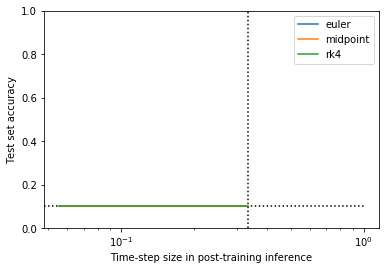

results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl


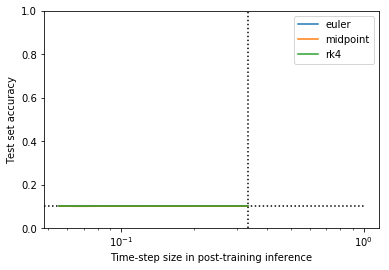

results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl


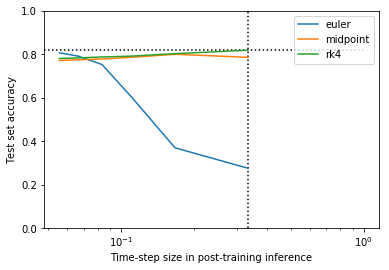

results/odenet_FMNIST_SingleSegment_ARCH_8_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl


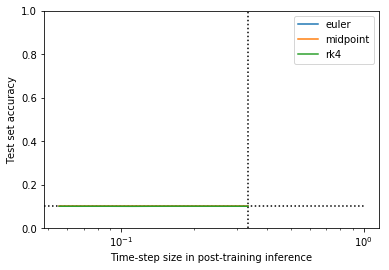

results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl


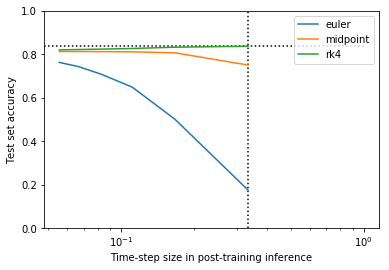

results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl


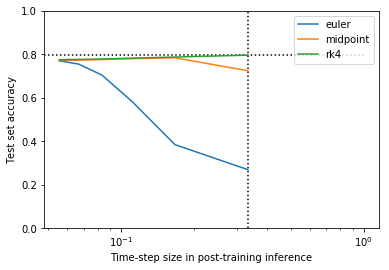

results/odenet_FMNIST_SingleSegment_ARCH_12_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl


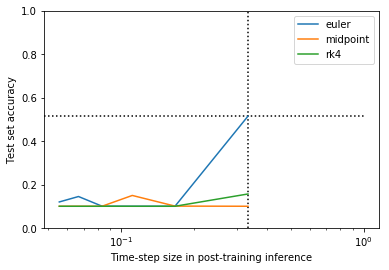

results/odenet_FMNIST_SingleSegment_ARCH_8_False_rk4_3_0.5_1_LEARN_0.1_5_None_Adjoint_KaimingInit_SEED_1.pkl


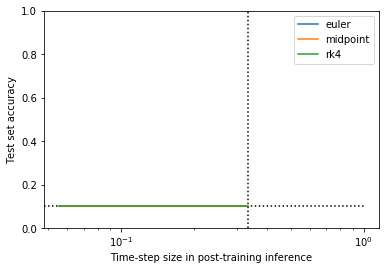

results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl


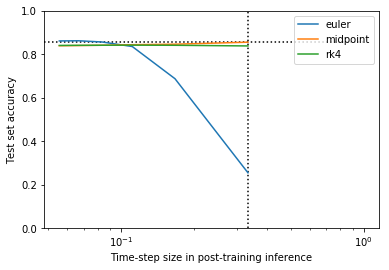

results/odenet_FMNIST_SingleSegment_ARCH_16_False_rk4_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl


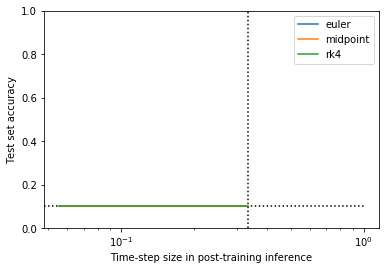

results/odenet_FMNIST_SingleSegment_ARCH_12_False_rk4_3_0.5_1_LEARN_0.01_5_None_Adjoint_KaimingInit_SEED_1.pkl


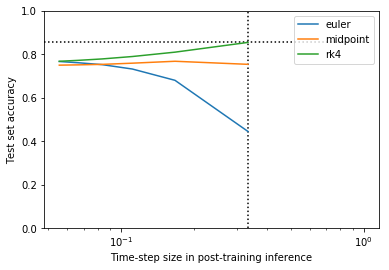

results/odenet_FMNIST_SingleSegment_ARCH_8_False_midpoint_3_0.5_1_LEARN_0.05_5_None_Adjoint_KaimingInit_SEED_1.pkl


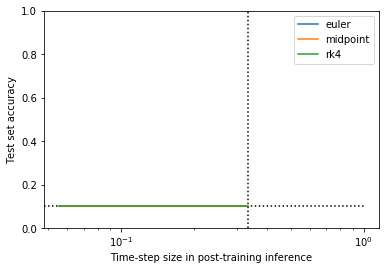

results/odenet_FMNIST_SingleSegment_ARCH_16_False_euler_3_0.5_1_LEARN_0.005_5_None_Adjoint_KaimingInit_SEED_1.pkl


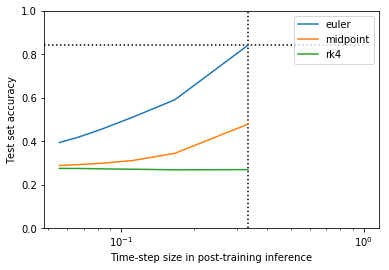

In [80]:
for name, accs_for_scheme in test_sweep.items():
    print(name)
    for scheme, accs in accs_for_scheme.items():
        x,y = zip(*accs)
        #if scheme in name:
        #    plt.semilogx(1.0/x[0],y[0],'o')
        # plt.vlines([3.0],0,1,linestyle='dotted')
        # plt.plot(x, y, label=scheme)

        if scheme in name:
            plt.hlines([y[0]],0,1.0, linestyles='dotted')
        plt.semilogx([1.0/_x for _x in x], y, label=scheme)
    plt.vlines([1.0/3.0],0,1,linestyles='dotted')
    plt.ylim(0.0,1)
    plt.legend()
    plt.xlabel('Time-step size in post-training inference')
    plt.ylabel('Test set accuracy')
    plt.show()

In [89]:
import pytorch_memlab

In [90]:
pytorch_memlab.MemReporter().report()

Element type                                            Size  Used MEM
-------------------------------------------------------------------------------
Storage on cuda:0
Parameter0                                     (12, 1, 3, 3)   512.00B
Parameter1                                             (12,)   512.00B
Parameter2                                             (12,)   512.00B
Tensor3                                                (12,)   512.00B
Tensor4                                                (12,)   512.00B
Tensor5                                                 (1,)   512.00B
Parameter6                                    (24, 12, 1, 1)     1.50K
Parameter7                                             (24,)   512.00B
Parameter8                                             (24,)   512.00B
Tensor9                                                (24,)   512.00B
Tensor10                                               (24,)   512.00B
Tensor11                                          

/home/ubuntu/.local/lib/python3.6/site-packages/torch/distributed/distributed_c10d.py:102: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn("torch.distributed.reduce_op is deprecated, please use "
